In [1]:
import typing
from collections import OrderedDict
from typing import Tuple

import gym
from gym import spaces
import numpy as np
import pandas as pd
import torch
from src.utils import zeros_space
import src.game1_dynamic_giveup as game

In [2]:
shift_positions = np.array([4.530000000000000000e+02,3.140000000000000000e+02,4.600000000000000000e+01,9.200000000000000000e+01,9.750000000000000000e+02,5.730000000000000000e+02,8.010000000000000000e+02,3.900000000000000000e+02,1.400000000000000000e+02,7.600000000000000000e+01,1.800000000000000000e+01,2.170000000000000000e+02
])
import src.utils as utils
data = utils.get_data()
opportunity_list = utils.get_opportunity_list(data)
stations, asteroids = utils.get_stations_and_asteroids(opportunity_list)
opportunities = len(opportunity_list)
# %%
env = game.WaterDropMarch(opportunity_list, shift_positions)
# %%
env.state
# env.step(0)
# env.step(1)
# %%
rewards = 0
for _ in range(10000):
    # action = env.action_space.sample()
    action = 0
    observation, reward, done, info = env.step(action)
    rewards += reward
    env.render()
    if done:
        # observation, info = env.reset()
        break
env.close()
# %%
rewards

array([3.7265253], dtype=float32)

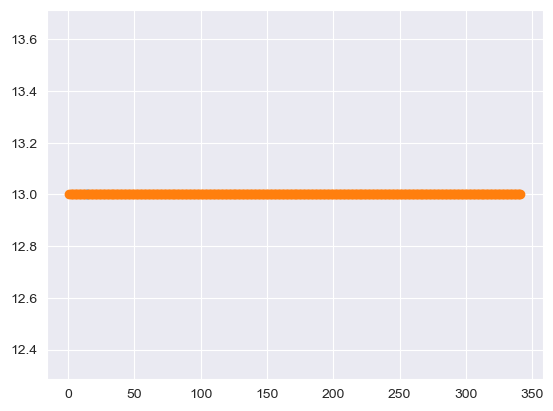

In [20]:
from matplotlib import pyplot as plt

env.reset()
env.step(0)
banned_channels = env.state["banned_channels"]
banned_channels
# x = np.array([i+1 for i in range(banned_channels)])
height  = 13
banned = np.argwhere(banned_channels==1)+1
not_banned = np.argwhere(banned_channels==0)+1

plt.scatter(banned, np.ones_like(banned)*height,)
plt.scatter(not_banned, np.ones_like(not_banned)*height)
# plt.scatter([1, len(banned_channels)], [height, height])
plt.show()


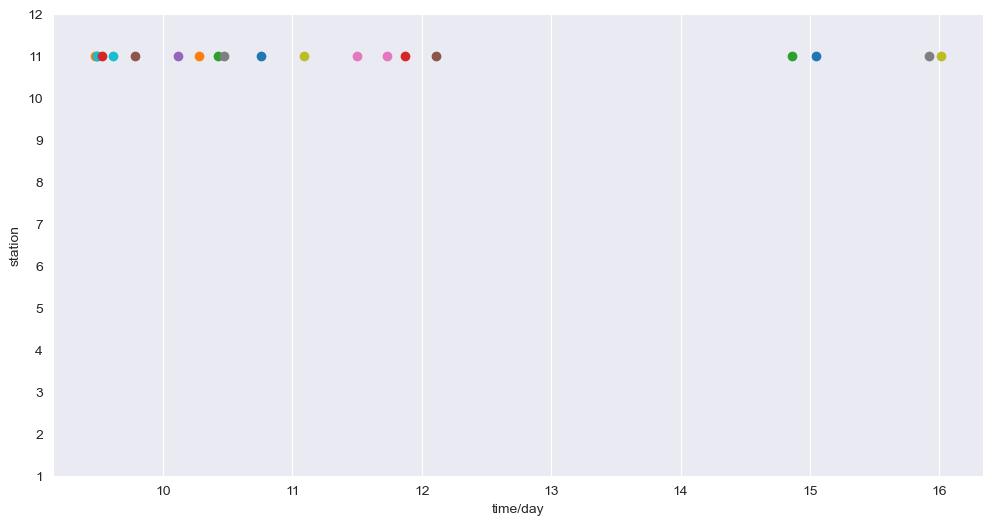

In [39]:
df = env.star_table
plt.figure(figsize=(12, 6))
sub = not_banned.squeeze()
for aster in sub:
    g = df[(df.asteroid==aster) & (df.station==env.state['current_row'])]
    if len(g) ==0: continue
    plt.scatter(g.time, g.station, label=f'aster{aster}')
# plt.legend()
plt.grid(axis='y')
plt.yticks(np.arange(12)+1)
plt.ylabel('station')
plt.xlabel('time/day')
plt.show()

In [ ]:

# plt.figure(figsize=(12, 6))
for aster in sub:
    g = df[df.asteroid==aster]
    plt.scatter(g.time, g.station, label=f'aster{aster}')
plt.legend()
plt.grid(axis='y')
plt.yticks(np.arange(12)+1)
plt.ylabel('station')
plt.xlabel('time/day')
plt.show()